In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Read CSV from path
path = "data/raw_fire_data.csv"


fire_data = pd.read_csv(path)

In [2]:
# Select and rename columns from original csv data
fire_data_columns = ["incident_name", "incident_id", "incident_county", 
                     "incident_longitude", "incident_latitude", "incident_acres_burned", 
                     "incident_date_created", "incident_date_extinguished"]

fire_columns_rename = fire_data[fire_data_columns].rename(columns={
    "incident_name":"Name of Fire",
    "incident_id":"Fire ID",
    "incident_county": "County", 
    "incident_longitude": "Longitude", 
    "incident_latitude": "Latitude", 
    "incident_acres_burned": "Acres Burned", 
    "incident_date_created": "Date Created", 
    "incident_date_extinguished": "Date Extinguished"})

In [3]:
#Clean and only look at Central California data
fire_data_clean = fire_columns_rename.dropna()

central_county = ["Sierra", "Nevada", "Placer", "Yuba", "Sacramento", "El Dorado", "Amador", "Alpine", "Calaveras", "Butte"]
central_county_data = fire_data_clean[fire_data_clean["County"].isin(central_county)]

In [4]:
# Change date columns to datetime data type
central_county_data["Date Created"] = pd.to_datetime(central_county_data["Date Created"]).dt.tz_localize(None)
central_county_data["Date Extinguished"] = pd.to_datetime(central_county_data["Date Extinguished"]).dt.tz_localize(None)

central_county_data["Year"] = central_county_data["Date Created"].dt.year

# Create column for duration of fire
central_county_data["Duration (Hours)"] = central_county_data["Date Extinguished"] - central_county_data["Date Created"]
central_county_data["Duration (Hours)"] = central_county_data["Duration (Hours)"].dt.total_seconds()
central_county_data["Duration (Hours)"] = round(central_county_data["Duration (Hours)"].astype("int") / 3600, 2)
clean_central_data = central_county_data[central_county_data["Duration (Hours)"]>=0]

#Disable warnings
warnings.filterwarnings('ignore')

clean_central_data.head()

c:\Users\Estelle\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Estelle\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Estelle\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Name of Fire,Fire ID,County,Longitude,Latitude,Acres Burned,Date Created,Date Extinguished,Year,Duration (Hours)
31,Lone Fire,1a5192f1-bc99-4130-8683-381e0534b76a,Butte,-121.576804,39.434183,298.0,2013-06-03 13:49:00,2013-06-03 20:00:00,2013,6.18
40,Roadrunner Fire,bf59bc5b-1398-4ae5-adef-6f61b9ee1b90,Amador,-120.966016,38.277830,96.0,2013-06-12 16:43:00,2013-06-13 09:45:00,2013,17.03
44,PFE Fire,fe47b1c2-b9c0-44be-8d10-f270056db35c,Placer,-121.380862,38.729297,237.0,2013-06-13 11:28:00,2013-06-13 14:15:00,2013,2.78
63,McGanney Fire,397ed8e6-6088-4e03-9316-8f50c65a83be,Yuba,-121.316340,39.206000,73.0,2013-07-08 09:59:00,2013-07-08 17:30:00,2013,7.52
65,Kyburz Fire,d778a3f0-2d23-43c1-b9bc-1ea33898fab2,El Dorado,-120.298000,38.774000,572.0,2013-07-08 12:45:00,2013-07-11 18:30:00,2013,77.75


In [5]:
# Reset the index
clean_central_data = clean_central_data.reset_index(drop=True)

In [6]:
#Calculate yearly fire data (num, avg and median acres burned, and avg and median duration (hours and days))
yearly_fires = clean_central_data.groupby(["Year"])["Fire ID"].count()
average_duration = clean_central_data.groupby(["Year"])["Duration (Hours)"].mean()
average_acres = clean_central_data.groupby(["Year"])["Acres Burned"].mean()
median_duration = clean_central_data.groupby(["Year"])["Duration (Hours)"].median()
median_acres = clean_central_data.groupby(["Year"])["Acres Burned"].median()


#Create a yearly summary chart (adding days columns)
yearly_summary_stats = pd.DataFrame({
    "Number of Fires":yearly_fires,
    "Avg. Acres":round(average_acres, 2),
    "Median Acres":median_acres,
    "Avg. Duration (Hours)":round(average_duration, 2),
    "Avg. Duration (Days)":round(average_duration / 24, 2),
    "Median Duration (Hours)":round(median_duration, 2),
    "Median Duration (Days)":round(median_duration / 24, 2)
})

yearly_summary_stats

,Number of Fires,Avg. Acres,Median Acres,Avg. Duration (Hours),Avg. Duration (Days),Median Duration (Hours),Median Duration (Days)
Year,,,,,,,
2013,14,2264.43,106.0,66.73,2.78,25.61,1.07
2014,9,10943.00,85.0,110.90,4.62,38.00,1.58
2015,13,5788.54,104.0,160.17,6.67,94.63,3.94
2016,30,161.07,87.5,54.16,2.26,28.32,1.18
2017,51,819.82,76.0,3988.57,166.19,4123.22,171.80
2018,27,5906.89,67.0,3562.97,148.46,3740.28,155.84
2019,21,82.05,50.0,79.41,3.31,16.79,0.70
2020,30,1967.23,77.0,49.83,2.08,17.59,0.73
2021,17,4254.88,118.0,285.29,11.89,45.98,1.92


In [7]:
#Create a groupby dataframe by County and Year.
##Calculate yearly fire data by County (num, avg and median acres burned, and avg and median duration (hours and days))
grouped_county_acres = clean_central_data.groupby(["Year","County"]).agg({"Acres Burned": ['count', 'mean', 'median', 'min', 'max'],
                                                                          "Duration (Hours)": ['mean', 'median', 'min', 'max']})

grouped_county_acres.columns = ["Number of Fires", "Avg. Acres Burned", "Median Acres Burned", "Min. Acres Burned", "Max. Acres Burned", 
                                "Avg. Duration (Hours)", "Median Duration (Hours)", "Min. Duration (Hours)", "Max. Duration (Hours)"
                               ]
grouped_county_acres["Avg. Duration (Days)"] = round(grouped_county_acres["Avg. Duration (Hours)"] / 24, 2)
grouped_county_acres["Median Duration (Days)"] = round(grouped_county_acres["Median Duration (Hours)"] / 24, 2)
grouped_county_acres["Min. Duration (Days)"] = round(grouped_county_acres["Min. Duration (Hours)"] / 24, 2)
grouped_county_acres["Max. Duration (Days)"] = round(grouped_county_acres["Max. Duration (Hours)"] / 24, 2)
# grouped_county_acres.columns = ["Number of Fires", "Avg. Acres Burned", "Median Acres Burned", "Min. Acres Burned", "Max. Acres Burned", 
#                                 "Avg. Duration (Hours)", "Avg. Duration (Days)", "Median Duration (Hours)", "Median Duration (Days)",
#                                 "Min. Duration (Hours)", "Min. Duration (Days)", "Max. Duration (Hours)", "Max. Duration (Days)"
#                                ]
grouped_county_acres = grouped_county_acres.reset_index("Year")
grouped_county_acres

,Year,Number of Fires,Avg. Acres Burned,Median Acres Burned,Min. Acres Burned,Max. Acres Burned,Avg. Duration (Hours),Median Duration (Hours),Min. Duration (Hours),Max. Duration (Hours),Avg. Duration (Days),Median Duration (Days),Min. Duration (Days),Max. Duration (Days)
County,,,,,,,,,,,,,,
Amador,2013,1,96.000000,96.0,96.0,96.0,17.030000,17.030,17.03,17.03,0.71,0.71,0.71,0.71
Butte,2013,5,607.800000,298.0,80.0,2264.0,55.058000,28.380,6.18,145.38,2.29,1.18,0.26,6.06
Calaveras,2013,2,38.500000,38.5,31.0,46.0,35.790000,35.790,26.60,44.98,1.49,1.49,1.11,1.87
El Dorado,2013,2,344.000000,344.0,116.0,572.0,40.875000,40.875,4.00,77.75,1.70,1.70,0.17,3.24
Nevada,2013,1,52.000000,52.0,52.0,52.0,6.800000,6.800,6.80,6.80,0.28,0.28,0.28,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Butte,2022,2,60.000000,60.0,54.0,66.0,28.635000,28.635,8.02,49.25,1.19,1.19,0.33,2.05
El Dorado,2022,1,20.000000,20.0,20.0,20.0,51.110000,51.110,51.11,51.11,2.13,2.13,2.13,2.13
Nevada,2022,3,332.000000,48.0,44.0,904.0,193.353333,215.410,52.28,312.37,8.06,8.98,2.18,13.02


In [8]:
#Create grouped county summary table for acres burned
county_summary_stats_acres = pd.DataFrame({
    "Year": grouped_county_acres["Year"],
    "Number of Fires": grouped_county_acres["Number of Fires"],
    "Avg. Acres Burned": round(grouped_county_acres["Avg. Acres Burned"], 2),
    "Median Acres Burned":grouped_county_acres["Median Acres Burned"],
    "Min. Acres Burned":grouped_county_acres["Min. Acres Burned"],
    "Max. Acres Burned":grouped_county_acres["Max. Acres Burned"],
})
county_summary_stats_acres

,Year,Number of Fires,Avg. Acres Burned,Median Acres Burned,Min. Acres Burned,Max. Acres Burned
County,,,,,,
Amador,2013,1,96.00,96.0,96.0,96.0
Butte,2013,5,607.80,298.0,80.0,2264.0
Calaveras,2013,2,38.50,38.5,31.0,46.0
El Dorado,2013,2,344.00,344.0,116.0,572.0
Nevada,2013,1,52.00,52.0,52.0,52.0
...,...,...,...,...,...,...
Butte,2022,2,60.00,60.0,54.0,66.0
El Dorado,2022,1,20.00,20.0,20.0,20.0
Nevada,2022,3,332.00,48.0,44.0,904.0


In [9]:
#Create grouped county summary table for duration
county_summary_stats_duration = pd.DataFrame({
    "Year": grouped_county_acres["Year"],
    "Avg. Duration (Hours)":round(grouped_county_acres["Avg. Duration (Hours)"], 2),
    "Avg. Duration (Days)":grouped_county_acres["Avg. Duration (Days)"],
    "Median Duration (Hours)":round(grouped_county_acres["Median Duration (Hours)"], 2),
    "Median Duration (Days)":grouped_county_acres["Median Duration (Days)"],
    "Min. Duration (Hours)":grouped_county_acres["Min. Duration (Hours)"],
    "Min. Duration (Days)":grouped_county_acres["Min. Duration (Days)"],
    "Max. Duration (Hours)":grouped_county_acres["Max. Duration (Hours)"],
    "Max. Duration (Days)":grouped_county_acres["Max. Duration (Days)"]
})
county_summary_stats_duration

,Year,Avg. Duration (Hours),Avg. Duration (Days),Median Duration (Hours),Median Duration (Days),Min. Duration (Hours),Min. Duration (Days),Max. Duration (Hours),Max. Duration (Days)
County,,,,,,,,,
Amador,2013,17.03,0.71,17.03,0.71,17.03,0.71,17.03,0.71
Butte,2013,55.06,2.29,28.38,1.18,6.18,0.26,145.38,6.06
Calaveras,2013,35.79,1.49,35.79,1.49,26.60,1.11,44.98,1.87
El Dorado,2013,40.88,1.70,40.88,1.70,4.00,0.17,77.75,3.24
Nevada,2013,6.80,0.28,6.80,0.28,6.80,0.28,6.80,0.28
...,...,...,...,...,...,...,...,...,...
Butte,2022,28.64,1.19,28.64,1.19,8.02,0.33,49.25,2.05
El Dorado,2022,51.11,2.13,51.11,2.13,51.11,2.13,51.11,2.13
Nevada,2022,193.35,8.06,215.41,8.98,52.28,2.18,312.37,13.02


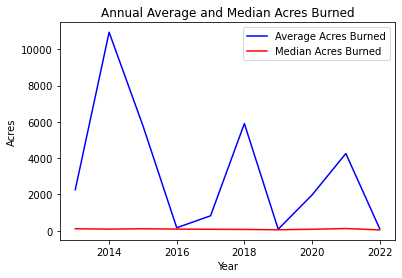

In [10]:
# Graph the average acres and median acres burned each year
year = central_county_data["Year"].unique()
avg_acres = yearly_summary_stats["Avg. Acres"]
med_acres = yearly_summary_stats["Median Acres"]

line_avg_acres = plt.plot(year, avg_acres, color="blue", label = "Average Acres Burned")
line_med_acres = plt.plot(year, med_acres, color="red", label = "Median Acres Burned")

# Create a legend for our chart
plt.legend(loc="upper right")

#Label and print graph
plt.title('Annual Average and Median Acres Burned')
plt.xlabel('Year')
plt.ylabel('Acres')

plt.show()

In [11]:
count_county_fires=county_summary_stats_acres.loc["Yuba"]
count_county_fires


,Year,Number of Fires,Avg. Acres Burned,Median Acres Burned,Min. Acres Burned,Max. Acres Burned
County,,,,,,
Yuba,2013,1,73.00,73.0,73.0,73.0
Yuba,2015,2,94.00,94.0,30.0,158.0
Yuba,2016,1,389.00,389.0,389.0,389.0
Yuba,2017,6,1830.17,44.5,10.0,9989.0
Yuba,2019,2,75.00,75.0,70.0,80.0
Yuba,2020,4,616.75,550.0,56.0,1311.0
Yuba,2021,3,126.33,150.0,45.0,184.0
Yuba,2022,3,50.33,39.0,30.0,82.0


No handles with labels found to put in legend.


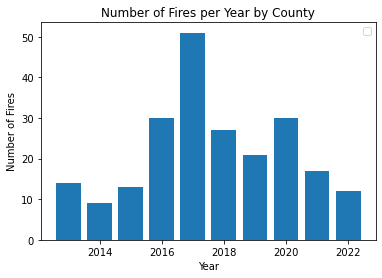

In [12]:
# Bar chart of the number of fires each year
count_annual_fires= yearly_summary_stats["Number of Fires"]
plt.bar(year, count_annual_fires)

#Stacked var chart of fires each year by county
# count_county_fires=county_summary_stats_acres.loc["Yuba", "Number of Fires"]
# ax = df.plot.bar(stacked=True)


#Label and print graph
plt.title('Number of Fires per Year by County')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend()

plt.show()

In [13]:
output_yearly_fire = "data/yearly_fire_data.csv"
output_county_fire = "data/county_fire_data.csv"
output_duration_fire = "data/duration_fire_data.csv"
yearly_summary_stats.to_csv(output_yearly_fire)
county_summary_stats_acres.to_csv(output_county_fire)
county_summary_stats_duration.to_csv(output_duration_fire)